Name: Abrar Ahmed Mohammed

CARZAM Project Notebook

# Downloading

In [1]:
import os
if not os.path.exists('./original_tool_image.zip'):
  ! wget -O original_tool_image.zip https://www.dropbox.com/s/pha9yzdfkmzoqob/original_tool_images.zip?dl=0

--2022-12-03 12:31:45--  https://www.dropbox.com/s/pha9yzdfkmzoqob/original_tool_images.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/pha9yzdfkmzoqob/original_tool_images.zip [following]
--2022-12-03 12:31:45--  https://www.dropbox.com/s/raw/pha9yzdfkmzoqob/original_tool_images.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc20617f0841f7dd35728328c931.dl.dropboxusercontent.com/cd/0/inline/Bx4KNe7vu4y38PmGoHX2zZNq8-r4RJkZ_-tfzKKxBmTJozu9bNDlfwpGq16hUEnsUQSY5BDj356dh-MuwZuoRz_3hb1w7cwxfHUXHuGARTZYaiGExMl5KHqWuPqcWT4tBFOTibkailLTtcEKOxZC3uKAyOjn4P8Fz6vjMczRLmlXhw/file# [following]
--2022-12-03 12:31:45--  https://uc20617f0841f7dd35728328c931.dl.dropboxusercontent.com/cd/0/inline/Bx4KNe7vu4y38PmGoHX2zZNq8-r4RJkZ_-tfzKK

# Setup

## Git Clone

### From Source

In [2]:
! rm -rf -- GLAMOR

In [3]:
! git clone -b master https://github.com/asuprem/GLAMOR

Cloning into 'GLAMOR'...
remote: Enumerating objects: 8567, done.
remote: Counting objects: 100% (470/470), done.
remote: Compressing objects: 100% (296/296), done.
remote: Total 8567 (delta 247), reused 286 (delta 131), pack-reused 8097
Receiving objects: 100% (8567/8567), 2.34 MiB | 4.40 MiB/s, done.
Resolving deltas: 100% (5638/5638), done.


In [4]:
!pip install -e GLAMOR/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/GLAMOR
     |████████████████████████████████| 1.3 MB 7.8 MB/s 
  Running setup.py develop for ednaml


###  From PyPi

In [ ]:
#! python -V

In [ ]:
#! pip3 install --pre ednaml==0.1.4

# Restart Notebook to Finish EdnaML Installation

# Setting up

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import ednaml
import glob, os
#from ednaml.core import EdnaDeploy, EdnaML
torch.__version__

'1.12.1+cu113'

## Definitions: Crawler

In [3]:
# Here we define our custom model class
from ednaml.crawlers import Crawler
from zipfile import ZipFile # might be useful in unzipping!

class CarZamCrawler(Crawler):
  def __init__(self, logger, file_name = "original_tool_images.zip", **kwargs): # Add your own arguments if needed!
    self.classes = {}
    self.metadata = {}
    self.metadata["train"] = {}
    self.metadata["test"] = {}
    self.metadata["val"] = {}
    self.metadata["train"]["crawl"] = []  # <------ THIS NEEDS TO BE POPULATED
    self.metadata["test"]["crawl"] = []   # <------ THIS NEEDS TO BE POPULATED
    self.metadata["val"]["crawl"] = []    # <------ THIS NEEDS TO BE POPULATED

    # YOUR CODE HERE ------ POPULATE self.classes and self.metadata's empty lists ---
    from zipfile import ZipFile
    file_name = "original_tool_image.zip"
    fdest= "unzipped"
    if not os.path.exists(fdest):
      with ZipFile(file_name, 'r') as zip: 
          # extract all files to another directory
          zip.extractall(fdest)
    fllist = glob.glob(os.path.join(fdest, "original_tool_images/*.jpg"))
    #tuple_prelim = [self.getinittuple(item) for item in fllist]
    temp=[]
    #ans=[]
    tokeep = ["Convertible", "Coupe", "Crossover", "Diesel", "Hybrid", "Sedan", "SUV", "Wagon","SportsCar", "Truck", "Van", ]
    tuple_expanded=[]
    for item in fllist:
      tuple_prelim=os.path.splitext(os.path.basename(item))[0].split(" "), item
      #print(tuple_prelim)
      if(len(tuple_prelim[0])==5):
        temp.append(tuple_prelim[1]) #appending path
        for i in tuple_prelim[0]:  #appending type,color,year,make,model
            if(i=="CoupeBlack"):
             temp.append("Coupe")
             temp.append("Black")
             temp.append(tuple_prelim[1:])
            else:
              temp.append(i)
        
        my_tuple=tuple(temp)        #list to Tuple
        tuple_expanded.append(my_tuple)   
        temp=[]
      elif(len(tuple_prelim[0])==6):
        temp.append(tuple_prelim[1])
        if(tuple_prelim[0][0]) in tokeep:
          for i in tuple_prelim[0][:4]:
            temp.append(i)
          temp.append(tuple_prelim[0][4]+tuple_prelim[0][5])

          my_tuple=tuple(temp)
          tuple_expanded.append(my_tuple)
          temp=[]
        else:
          temp.append(tuple_prelim[0][0]+tuple_prelim[0][1])
          for i in tuple_prelim[0][2:]:
            temp.append(i)
          #temp.append(tuple_prelim[1])
          my_tuple=tuple(temp)
          tuple_expanded.append(my_tuple)
          temp=[]
  #print(ans)
      elif(len(tuple_prelim[0])==7):
        temp.append(tuple_prelim[1])
        if tuple_prelim[0][0] in tokeep:
          for i in tuple_prelim[0][:4]:
            temp.append(i)
          temp.append(tuple_prelim[0][4:])

          my_tuple=tuple(temp)
          tuple_expanded.append(my_tuple)
          temp=[]
        else:
          temp.append(tuple_prelim[0][0]+tuple_prelim[0][1])
          for i in tuple_prelim[0][2:5]:
            temp.append(i)
          temp.append(tuple_prelim[0][5]+tuple_prelim[0][6])
        
          my_tuple=tuple(temp)
          tuple_expanded.append(my_tuple)
          temp=[]
    #print("Tuple_expanded:")
    #print(tuple_expanded[0])
    import random
    random.seed(3456)
    random.shuffle(tuple_expanded)

    splits = 0.8
    train_sets = int(len(tuple_expanded)*0.8)
    val_sets = int(len(tuple_expanded)*0.1)

    

    # structure:  (path, type, color, year, make)
    # idx           0     1     2     3     4
    print("Outliers\n")
    for item in tuple_expanded:
      if(item[1]=='CoupeBlack'):
        print(item)
        print("\n")
    
    types = list(set([item[1] for item in tuple_expanded]))
    print("types:",types)
    colors = list(set([item[2] for item in tuple_expanded]))
    years = list(set([item[3] for item in tuple_expanded]))
    makes = list(set([item[4] for item in tuple_expanded]))

    self.classes["vtype"] = len(types)
    self.classes["color"] = len(colors)
    self.classes["year"] = len(years)
    self.classes["make"] = len(makes)

    self.type_lookup = {item:idx for idx,item in enumerate(types)}
    self.color_lookup = {item:idx for idx,item in enumerate(colors)}
    self.year_lookup = {item:idx for idx,item in enumerate(years)}
    self.make_lookup = {item:idx for idx,item in enumerate(makes)}
    
    tuple_ex=tuple_expanded
    tuple_expanded = [(item[0], self.type_lookup[item[1]], self.color_lookup[item[2]], self.year_lookup[item[3]], self.make_lookup[item[4]]) for item in tuple_expanded]
    print("\n")
    print("Tuple_expanded\n")
    print(tuple_expanded[:5])

    #split the datasets
    self.metadata["train"]["crawl"] = tuple_expanded[:train_sets]
    self.metadata["val"]["crawl"] = tuple_expanded[train_sets:val_sets]
    self.metadata["test"]["crawl"] = tuple_expanded[train_sets+val_sets:]


    # -------------------------------------------------------------------------------

    self.metadata["train"]["classes"] = self.classes
    self.metadata["test"]["classes"] = self.classes
    self.metadata["val"]["classes"] = self.classes

  def getinittuple(self, item):
    return (os.path.splitext(os.path.basename(item))[0].split(" "), item)

    


## Testing the Crawler

In [4]:
kwargs = {
    "logger" : None,
    "file_name" : "original_tool_images.zip",
    # add any other kwargs here...
}

In [5]:
crawler = CarZamCrawler(**kwargs)

Outliers

types: ['Coupe', 'Wagon', 'Hybrid', 'LuxuryVehicle', 'Diesel', 'SUV', 'Convertible', 'PickupTruck', 'Van', 'Crossover', 'ElectricVehicle', 'SportsCar', 'Sedan']
Tuple_expanded

[('unzipped/original_tool_images/Sedan Blue 2016 Mercedes-Benz E350.jpg', 12, 0, 12, 19), ('unzipped/original_tool_images/Crossover White 2017 Chevrolet Equinox.jpg', 9, 9, 4, 23), ('unzipped/original_tool_images/Sports Car White 2017 Chevrolet Corvette.jpg', 11, 9, 4, 23), ('unzipped/original_tool_images/Sedan Silver 2020 Honda Accord.jpg', 12, 11, 8, 27), ('unzipped/original_tool_images/Sedan Black 2015 BMW 550.jpg', 12, 7, 10, 6)]


In [6]:
crawler.classes # You should get the classes here

{'vtype': 13, 'color': 13, 'year': 14, 'make': 36}

In [7]:
crawler.metadata["train"]["crawl"][:5]  # You should get the list of tuples here

[('unzipped/original_tool_images/Sedan Blue 2016 Mercedes-Benz E350.jpg',
  12,
  0,
  12,
  19),
 ('unzipped/original_tool_images/Crossover White 2017 Chevrolet Equinox.jpg',
  9,
  9,
  4,
  23),
 ('unzipped/original_tool_images/Sports Car White 2017 Chevrolet Corvette.jpg',
  11,
  9,
  4,
  23),
 ('unzipped/original_tool_images/Sedan Silver 2020 Honda Accord.jpg',
  12,
  11,
  8,
  27),
 ('unzipped/original_tool_images/Sedan Black 2015 BMW 550.jpg', 12, 7, 10, 6)]

# Statistics

In [8]:
import matplotlib.pyplot as plt

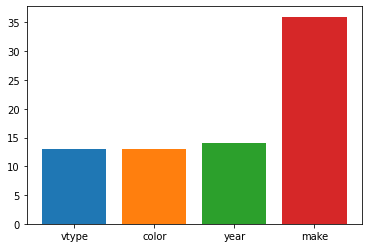

In [13]:
# Write code to collect info on # makes, models, year, type
#
#
for i in crawler.classes:
  plt.bar(i,crawler.classes[i])


3.1 Single classification (Vehicle Type)

In [ ]:
class_name = "vtype"  # Make sure to change this to whatever name you used for make in your `original_tool_images` crawler
class_idx = 1         # Make sure to change this to whetever index `type` is in your Crawler's tuple!
path_idx = 0          # Change this to whichever index in tuple has path
crawler_args = {"file_name" : "original_tool_image.zip"}

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from ednaml.core import EdnaML
from ednaml.generators import ClassificationGenerator

eml = EdnaML(config = "./GLAMOR/profiles/CarZam/base_config.yml", config_inject=[
    ("SAVE.MODEL_QUALIFIER", class_name)
])

eml.cfg.EXECUTION.DATAREADER.CRAWLER_ARGS = crawler_args
eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["pathidx"] = path_idx
eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["annotationidx"] = class_idx
eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["classificationclass"] = class_name

eml.addGeneratorClass(ClassificationGenerator)
eml.addCrawlerClass(CarZamCrawler)

Injected key-value pair:  SAVE.MODEL_QUALIFIER, vtype


In [ ]:
eml.apply()

03:26:57 ****************************************
03:26:57 
03:26:57 
03:26:57 Using the following configuration:
03:26:57 DEPLOYMENT:
  DATAREADER:
    CRAWLER_ARGS: {}
    DATAREADER: DataReader
    DATASET_ARGS: {}
    GENERATOR: null
    GENERATOR_ARGS: {}
  DEPLOY: BaseDeploy
  DEPLOYMENT_ARGS: {}
  EPOCHS: 1
  OUTPUT_ARGS: {}
  PLUGIN:
    HOOKS: always
    RESET: false
EXECUTION:
  DATAREADER:
    CRAWLER_ARGS:
      file_name: original_tool_image.zip
    DATAREADER: DataReader
    DATASET_ARGS:
      annotationidx: 1
      classificationclass: vtype
      pathidx: 0
    GENERATOR: null
    GENERATOR_ARGS: {}
  EPOCHS: 10
  FP16: false
  MODEL_SERVING: Unused
  OPTIMIZER_BUILDER: ClassificationOptimizer
  PLUGIN:
    HOOKS: always
    RESET: false
  SKIPEVAL: false
  TEST_FREQUENCY: 1
  TRAINER: ClassificationTrainer
  TRAINER_ARGS:
    accumulation_steps: 4
LOGGING:
  INPUT_SIZE: null
  STEP_VERBOSE: 100
LOSS:
- KWARGS:
  - {}
  LABEL: ''
  LAMBDAS:
  - 1.0
  LOSSES:
  - Softma

46827520/46827520 bytes [████████████████████████████████████████████████████████████████████████████████████████████████████]

03:26:57 No previous stop detected. Will start from epoch 0
03:26:57 Loaded BaseStorage from ednaml.storage to build Storage
03:26:57 Reading data with DataReader DataReader
03:26:57 Default CRAWLER is <class 'ednaml.crawlers.Crawler'>
03:26:57 Default DATASET is <class 'torch.utils.data.dataset.Dataset'>
03:26:57 Default GENERATOR is <class 'ednaml.generators.ImageGenerator.ImageGenerator'>
03:26:57 Updating GENERATOR to queued class ClassificationGenerator
03:26:57 Updating CRAWLER to CarZamCrawler



Download of resnet18-5c106cde.pth to https://download.pytorch.org/models/resnet18-5c106cde.pth completed


03:26:57 Generated training data generator with 1575 training data points
03:26:57 Running classification model with classes: {'vtype': {'classes': 13}}
03:26:57 Generated test data/query generator
03:26:57 Loaded classification_model_builder from ednaml.models to build model


Outliers

types: ['ElectricVehicle', 'Wagon', 'Coupe', 'SUV', 'Van', 'PickupTruck', 'Sedan', 'Hybrid', 'LuxuryVehicle', 'Convertible', 'Diesel', 'SportsCar', 'Crossover']
Tuple_expanded

[('unzipped/original_tool_images/Hybrid Silver 2021 Toyota Avalon Hybrid.jpg', 7, 2, 0, 7), ('unzipped/original_tool_images/Crossover Black 2018 Jeep Compass.jpg', 12, 3, 5, 27), ('unzipped/original_tool_images/Sedan Gray 2017 Honda Fit.jpg', 6, 0, 8, 10), ('unzipped/original_tool_images/Pickup Truck Tan 2017 Toyota Tacoma.jpg', 5, 7, 8, 7), ('unzipped/original_tool_images/Luxury Vehicle Gold 2015 Cadillac CTS.jpg', 8, 11, 1, 18)]


03:26:58 Finished instantiating model with ClassificationResnet architecture
03:26:58 Adding plugins after constructing model
03:26:58 No saved model weights provided.
03:27:02 Model Summary retured the following error:
03:27:02 Traceback (most recent call last):
  File "/content/GLAMOR/src/ednaml/core/EdnaML.py", line 888, in getModelSummary
    self.cfg.TRAIN_TRANSFORMATION.INPUT_SIZE,
AttributeError: 'TransformationConfig' object has no attribute 'INPUT_SIZE'

03:27:02 Loaded ClassificationOptimizer from ednaml.optimizer to build Optimizer model
03:27:02 Built optimizer
03:27:02 Built scheduler
03:27:02 Added SoftmaxLogitsLoss with lambda = 1.0 and loss arguments {}
03:27:02 Built loss function
03:27:02 Built loss optimizer
03:27:02 Built loss scheduler
03:27:02 Loaded BaseStorage from ednaml.storage to build Storage
03:27:02 Loaded ClassificationTrainer from ednaml.trainer to build Trainer
03:27:02 Saving model metadata
03:27:02 Backing up metadata
03:27:02 Finished metadata backup

In [ ]:
eml.train()

03:27:13 Starting training
03:27:13 Logging to:	origtoolimgs-v1-singleclass-vtype-logger.log
03:27:13 Models will be saved to local directory:	origtoolimgs-v1-singleclass-vtype
03:27:13 Models will be saved with base name:	origtoolimgs-v1_epoch[].pth
03:27:13 Optimizers will be saved with base name:	origtoolimgs-v1_epoch[]_optimizer.pth
03:27:13 Schedulers will be saved with base name:	origtoolimgs-v1_epoch[]_scheduler.pth
03:27:13 Performing initial evaluation...
03:27:20 Obtained features, validation in progress
03:27:20 Accuracy: 14.141%
03:27:20 Micro F-score: 0.141
03:27:20 Weighted F-score: 0.063
03:27:20 Starting training from 0
03:27:21 Parameter Group `opt-1`: Starting epoch 0 with 50 steps and learning rate 1.00000E-05
03:27:35 ********** Completed epoch 0 **********
03:27:35 Model evaluation triggered, but gradients still need accumulation. Will evaluate after accumulation.
03:27:35 Model save triggered, but gradients still need accumulation. Will save after accumulation.
03

In [ ]:
resp = eml.eval()

03:30:32 Obtained features, validation in progress
03:30:32 Accuracy: 41.414%
03:30:32 Micro F-score: 0.414
03:30:32 Weighted F-score: 0.321


3.2 Single classification (Vehicle Color)

In [ ]:
class_name = "color"   # Make sure to change this to whatever name you used for make in your `original_tool_images` crawler
class_idx = 2         # Make sure to change this to whetever index `color` is in your Crawler's tuple!
path_idx = 0          # Change this to whichever index in tuple has path
crawler_args = {"file_name" : "original_tool_image.zip"}

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from ednaml.core import EdnaML
from ednaml.generators import ClassificationGenerator

eml = EdnaML(config = "./GLAMOR/profiles/CarZam/base_config.yml", config_inject=[
    ("SAVE.MODEL_QUALIFIER", class_name)
])

eml.cfg.EXECUTION.DATAREADER.CRAWLER_ARGS = crawler_args
eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["pathidx"] = path_idx
eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["annotationidx"] = class_idx
eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["classificationclass"] = class_name

eml.addGeneratorClass(ClassificationGenerator)
eml.addCrawlerClass(CarZamCrawler)

Injected key-value pair:  SAVE.MODEL_QUALIFIER, color


In [ ]:
eml.apply()

03:35:24 ****************************************
03:35:24 
03:35:24 
03:35:24 Using the following configuration:
03:35:24 DEPLOYMENT:
  DATAREADER:
    CRAWLER_ARGS: {}
    DATAREADER: DataReader
    DATASET_ARGS: {}
    GENERATOR: null
    GENERATOR_ARGS: {}
  DEPLOY: BaseDeploy
  DEPLOYMENT_ARGS: {}
  EPOCHS: 1
  OUTPUT_ARGS: {}
  PLUGIN:
    HOOKS: always
    RESET: false
EXECUTION:
  DATAREADER:
    CRAWLER_ARGS:
      file_name: original_tool_image.zip
    DATAREADER: DataReader
    DATASET_ARGS:
      annotationidx: 2
      classificationclass: color
      pathidx: 0
    GENERATOR: null
    GENERATOR_ARGS: {}
  EPOCHS: 10
  FP16: false
  MODEL_SERVING: Unused
  OPTIMIZER_BUILDER: ClassificationOptimizer
  PLUGIN:
    HOOKS: always
    RESET: false
  SKIPEVAL: false
  TEST_FREQUENCY: 1
  TRAINER: ClassificationTrainer
  TRAINER_ARGS:
    accumulation_steps: 4
LOGGING:
  INPUT_SIZE: null
  STEP_VERBOSE: 100
LOSS:
- KWARGS:
  - {}
  LABEL: ''
  LAMBDAS:
  - 1.0
  LOSSES:
  - Softma

Outliers

types: ['ElectricVehicle', 'Wagon', 'Coupe', 'SUV', 'Van', 'PickupTruck', 'Sedan', 'Hybrid', 'LuxuryVehicle', 'Convertible', 'Diesel', 'SportsCar', 'Crossover']
Tuple_expanded

[('unzipped/original_tool_images/Hybrid Silver 2021 Toyota Avalon Hybrid.jpg', 7, 2, 0, 7), ('unzipped/original_tool_images/Crossover Black 2018 Jeep Compass.jpg', 12, 3, 5, 27), ('unzipped/original_tool_images/Sedan Gray 2017 Honda Fit.jpg', 6, 0, 8, 10), ('unzipped/original_tool_images/Pickup Truck Tan 2017 Toyota Tacoma.jpg', 5, 7, 8, 7), ('unzipped/original_tool_images/Luxury Vehicle Gold 2015 Cadillac CTS.jpg', 8, 11, 1, 18)]


03:35:25 Finished instantiating model with ClassificationResnet architecture
03:35:25 Adding plugins after constructing model
03:35:25 No saved model weights provided.
03:35:25 Model Summary retured the following error:
03:35:25 Traceback (most recent call last):
  File "/content/GLAMOR/src/ednaml/core/EdnaML.py", line 888, in getModelSummary
    self.cfg.TRAIN_TRANSFORMATION.INPUT_SIZE,
AttributeError: 'TransformationConfig' object has no attribute 'INPUT_SIZE'

03:35:25 Loaded ClassificationOptimizer from ednaml.optimizer to build Optimizer model
03:35:25 Built optimizer
03:35:25 Built scheduler
03:35:25 Added SoftmaxLogitsLoss with lambda = 1.0 and loss arguments {}
03:35:25 Built loss function
03:35:25 Built loss optimizer
03:35:25 Built loss scheduler
03:35:25 Loaded BaseStorage from ednaml.storage to build Storage
03:35:25 Loaded ClassificationTrainer from ednaml.trainer to build Trainer
03:35:25 Saving model metadata
03:35:25 Backing up metadata
03:35:25 Finished metadata backup

In [ ]:
eml.train()

03:35:28 Starting training
03:35:28 Logging to:	origtoolimgs-v1-singleclass-color-logger.log
03:35:28 Models will be saved to local directory:	origtoolimgs-v1-singleclass-color
03:35:28 Models will be saved with base name:	origtoolimgs-v1_epoch[].pth
03:35:28 Optimizers will be saved with base name:	origtoolimgs-v1_epoch[]_optimizer.pth
03:35:28 Schedulers will be saved with base name:	origtoolimgs-v1_epoch[]_scheduler.pth
03:35:28 Performing initial evaluation...
03:35:30 Obtained features, validation in progress
03:35:30 Accuracy: 19.697%
03:35:30 Micro F-score: 0.197
03:35:30 Weighted F-score: 0.082
03:35:30 Starting training from 0
03:35:31 Parameter Group `opt-1`: Starting epoch 0 with 50 steps and learning rate 1.00000E-05
03:35:44 ********** Completed epoch 0 **********
03:35:44 Model evaluation triggered, but gradients still need accumulation. Will evaluate after accumulation.
03:35:44 Model save triggered, but gradients still need accumulation. Will save after accumulation.
03

In [ ]:
resp = eml.eval()

03:39:17 Obtained features, validation in progress
03:39:17 Accuracy: 76.768%
03:39:17 Micro F-score: 0.768
03:39:17 Weighted F-score: 0.727


3.3 Single classification (Vehicle Make)

In [ ]:
class_name = "make"   # Make sure to change this to whatever name you used for make in your `original_tool_images` crawler
class_idx = 4         # Make sure to change this to whetever index `make` is in your Crawler's tuple!
path_idx = 0          # Change this to whichever index in tuple has path
crawler_args = {"file_name" : "original_tool_image.zip"}

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from ednaml.core import EdnaML
from ednaml.generators import ClassificationGenerator

eml = EdnaML(config = "./GLAMOR/profiles/CarZam/base_config.yml", config_inject=[
    ("SAVE.MODEL_QUALIFIER", class_name)
])

eml.cfg.EXECUTION.DATAREADER.CRAWLER_ARGS = crawler_args
eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["pathidx"] = path_idx
eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["annotationidx"] = class_idx
eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["classificationclass"] = class_name

eml.addGeneratorClass(ClassificationGenerator)
eml.addCrawlerClass(CarZamCrawler)

Injected key-value pair:  SAVE.MODEL_QUALIFIER, make


In [ ]:
eml.apply()

03:40:49 ****************************************
03:40:49 
03:40:49 
03:40:49 Using the following configuration:
03:40:49 DEPLOYMENT:
  DATAREADER:
    CRAWLER_ARGS: {}
    DATAREADER: DataReader
    DATASET_ARGS: {}
    GENERATOR: null
    GENERATOR_ARGS: {}
  DEPLOY: BaseDeploy
  DEPLOYMENT_ARGS: {}
  EPOCHS: 1
  OUTPUT_ARGS: {}
  PLUGIN:
    HOOKS: always
    RESET: false
EXECUTION:
  DATAREADER:
    CRAWLER_ARGS:
      file_name: original_tool_image.zip
    DATAREADER: DataReader
    DATASET_ARGS:
      annotationidx: 4
      classificationclass: make
      pathidx: 0
    GENERATOR: null
    GENERATOR_ARGS: {}
  EPOCHS: 10
  FP16: false
  MODEL_SERVING: Unused
  OPTIMIZER_BUILDER: ClassificationOptimizer
  PLUGIN:
    HOOKS: always
    RESET: false
  SKIPEVAL: false
  TEST_FREQUENCY: 1
  TRAINER: ClassificationTrainer
  TRAINER_ARGS:
    accumulation_steps: 4
LOGGING:
  INPUT_SIZE: null
  STEP_VERBOSE: 100
LOSS:
- KWARGS:
  - {}
  LABEL: ''
  LAMBDAS:
  - 1.0
  LOSSES:
  - Softmax

Outliers

types: ['ElectricVehicle', 'Wagon', 'Coupe', 'SUV', 'Van', 'PickupTruck', 'Sedan', 'Hybrid', 'LuxuryVehicle', 'Convertible', 'Diesel', 'SportsCar', 'Crossover']
Tuple_expanded

[('unzipped/original_tool_images/Hybrid Silver 2021 Toyota Avalon Hybrid.jpg', 7, 2, 0, 7), ('unzipped/original_tool_images/Crossover Black 2018 Jeep Compass.jpg', 12, 3, 5, 27), ('unzipped/original_tool_images/Sedan Gray 2017 Honda Fit.jpg', 6, 0, 8, 10), ('unzipped/original_tool_images/Pickup Truck Tan 2017 Toyota Tacoma.jpg', 5, 7, 8, 7), ('unzipped/original_tool_images/Luxury Vehicle Gold 2015 Cadillac CTS.jpg', 8, 11, 1, 18)]


03:40:49 Finished instantiating model with ClassificationResnet architecture
03:40:49 Adding plugins after constructing model
03:40:49 No saved model weights provided.
03:40:49 Model Summary retured the following error:
03:40:49 Traceback (most recent call last):
  File "/content/GLAMOR/src/ednaml/core/EdnaML.py", line 888, in getModelSummary
    self.cfg.TRAIN_TRANSFORMATION.INPUT_SIZE,
AttributeError: 'TransformationConfig' object has no attribute 'INPUT_SIZE'

03:40:49 Loaded ClassificationOptimizer from ednaml.optimizer to build Optimizer model
03:40:49 Built optimizer
03:40:49 Built scheduler
03:40:49 Added SoftmaxLogitsLoss with lambda = 1.0 and loss arguments {}
03:40:49 Built loss function
03:40:49 Built loss optimizer
03:40:49 Built loss scheduler
03:40:49 Loaded BaseStorage from ednaml.storage to build Storage
03:40:49 Loaded ClassificationTrainer from ednaml.trainer to build Trainer
03:40:49 Saving model metadata
03:40:49 Backing up metadata
03:40:49 Finished metadata backup

In [ ]:
eml.train()

03:40:58 Starting training
03:40:58 Logging to:	origtoolimgs-v1-singleclass-make-logger.log
03:40:58 Models will be saved to local directory:	origtoolimgs-v1-singleclass-make
03:40:58 Models will be saved with base name:	origtoolimgs-v1_epoch[].pth
03:40:58 Optimizers will be saved with base name:	origtoolimgs-v1_epoch[]_optimizer.pth
03:40:58 Schedulers will be saved with base name:	origtoolimgs-v1_epoch[]_scheduler.pth
03:40:58 Performing initial evaluation...
03:41:00 Obtained features, validation in progress
03:41:00 Accuracy: 0.000%
03:41:00 Micro F-score: 0.000
03:41:00 Weighted F-score: 0.000
03:41:00 Starting training from 0
03:41:01 Parameter Group `opt-1`: Starting epoch 0 with 50 steps and learning rate 1.00000E-05
03:41:17 ********** Completed epoch 0 **********
03:41:17 Model evaluation triggered, but gradients still need accumulation. Will evaluate after accumulation.
03:41:17 Model save triggered, but gradients still need accumulation. Will save after accumulation.
03:41

In [ ]:
resp = eml.eval()

03:44:19 Obtained features, validation in progress
03:44:19 Accuracy: 53.030%
03:44:19 Micro F-score: 0.530
03:44:19 Weighted F-score: 0.477


**4. Multiclass classifiers**
Multiclass classifiers try to classify multiple things at once, using the same features. Sometimes it works, if the features are colocated or have some overlap. Othertimes, it doesn't work very well. We can examine this in case of our small dataset first.

4.1 Multi-class classification (color-type)
Now we will try a model that performs vehicle type AND vehicle color classification together. The config is already prepared for this in profiles/color_type.yml.

In [ ]:
path_idx = 0          # Change this to whichever index in tuple has path
crawler_args = {"file_name" : "original_tool_image.zip"}

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from ednaml.core import EdnaML
from ednaml.generators import ClassificationGenerator

eml = EdnaML(config = ["./GLAMOR/profiles/CarZam/base_config.yml","./GLAMOR/profiles/CarZam/color_type.yml"])

eml.cfg.EXECUTION.DATAREADER.CRAWLER_ARGS = crawler_args
eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["pathidx"] = path_idx
# We have already set these in config
#eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["annotationidx"] = class_idx
#eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["classificationclass"] = class_name

#eml.addGeneratorClass(MultiClassificationGenerator)
eml.addCrawlerClass(CarZamCrawler)

In [ ]:
eml.apply()

06:21:07 ****************************************
06:21:07 
06:21:07 
06:21:07 Using the following configuration:
06:21:07 DEPLOYMENT:
  DATAREADER:
    CRAWLER_ARGS: {}
    DATAREADER: DataReader
    DATASET_ARGS: {}
    GENERATOR: null
    GENERATOR_ARGS: {}
  DEPLOY: BaseDeploy
  DEPLOYMENT_ARGS: {}
  EPOCHS: 1
  OUTPUT_ARGS: {}
  PLUGIN:
    HOOKS: always
    RESET: false
EXECUTION:
  DATAREADER:
    CRAWLER_ARGS:
      file_name: original_tool_image.zip
    DATAREADER: DataReader
    DATASET_ARGS:
      annotationidx:
      - 2
      - 1
      classificationclass:
      - color
      - vtype
      pathidx: 0
    GENERATOR: MultiClassificationGenerator
    GENERATOR_ARGS: {}
  EPOCHS: 10
  FP16: false
  MODEL_SERVING: Unused
  OPTIMIZER_BUILDER: ClassificationOptimizer
  PLUGIN:
    HOOKS: always
    RESET: false
  SKIPEVAL: false
  TEST_FREQUENCY: 1
  TRAINER: MultiClassificationTrainer
  TRAINER_ARGS:
    accumulation_steps: 4
LOGGING:
  INPUT_SIZE: null
  STEP_VERBOSE: 100
LOSS:

46827520/46827520 bytes [████████████████████████████████████████████████████████████████████████████████████████████████████]

06:21:07 No previous stop detected. Will start from epoch 0
06:21:07 Loaded BaseStorage from ednaml.storage to build Storage
06:21:07 Reading data with DataReader DataReader
06:21:07 Default CRAWLER is <class 'ednaml.crawlers.Crawler'>



Download of resnet18-5c106cde.pth to https://download.pytorch.org/models/resnet18-5c106cde.pth completed


06:21:07 Default DATASET is <class 'torch.utils.data.dataset.Dataset'>
06:21:07 Default GENERATOR is <class 'ednaml.generators.ImageGenerator.ImageGenerator'>
06:21:07 Updating GENERATOR using config specification to MultiClassificationGenerator
06:21:07 Updating CRAWLER to CarZamCrawler


Outliers

types: ['Convertible', 'PickupTruck', 'Hybrid', 'Van', 'ElectricVehicle', 'Diesel', 'Crossover', 'Wagon', 'LuxuryVehicle', 'Sedan', 'SportsCar', 'Coupe', 'SUV']
Tuple_expanded

[('unzipped/original_tool_images/Hybrid Silver 2021 Toyota Avalon Hybrid.jpg', 2, 0, 2, 22), ('unzipped/original_tool_images/Crossover Black 2018 Jeep Compass.jpg', 6, 5, 0, 8), ('unzipped/original_tool_images/Sedan Gray 2017 Honda Fit.jpg', 9, 12, 5, 33), ('unzipped/original_tool_images/Pickup Truck Tan 2017 Toyota Tacoma.jpg', 1, 9, 5, 22), ('unzipped/original_tool_images/Luxury Vehicle Gold 2015 Cadillac CTS.jpg', 8, 3, 1, 27)]


06:21:07 Generated training data generator with 1575 training data points
06:21:07 Running classification model with classes: {'color': {'classes': 13}, 'vtype': {'classes': 13}}
06:21:07 Generated test data/query generator
06:21:07 Loaded multiclassification_model_builder from ednaml.models to build model
06:21:08 Finished instantiating model with MultiClassificationResnet architecture
06:21:08 Adding plugins after constructing model
06:21:08 No saved model weights provided.
06:21:12 Model Summary retured the following error:
06:21:12 Traceback (most recent call last):
  File "/content/GLAMOR/src/ednaml/core/EdnaML.py", line 888, in getModelSummary
    self.cfg.TRAIN_TRANSFORMATION.INPUT_SIZE,
AttributeError: 'TransformationConfig' object has no attribute 'INPUT_SIZE'

06:21:12 Loaded ClassificationOptimizer from ednaml.optimizer to build Optimizer model
06:21:12 Built optimizer
06:21:12 Built scheduler
06:21:12 Added SoftmaxLogitsLoss with lambda = 1.0 and loss arguments {}
06:21:12 

In [ ]:
eml.train()

06:21:19 Starting training
06:21:19 Logging to:	origtoolimgs-v1-multiclass-color-vtype-logger.log
06:21:19 Models will be saved to local directory:	origtoolimgs-v1-multiclass-color-vtype
06:21:19 Models will be saved with base name:	origtoolimgs-v1_epoch[].pth
06:21:19 Optimizers will be saved with base name:	origtoolimgs-v1_epoch[]_optimizer.pth
06:21:19 Schedulers will be saved with base name:	origtoolimgs-v1_epoch[]_scheduler.pth
06:21:19 Performing initial evaluation...
06:21:27 Obtained features, validation in progress
06:21:27 Metrics	colorloss	typeloss
06:21:27 Accuracy	color: 0.182	vtype: 0.086
06:21:27 M F-Score	color: 0.182	vtype: 0.086
06:21:27 W F-Score	color: 0.108	vtype: 0.028
06:21:27 Starting training from 0
06:21:28 Parameter Group `opt-1`: Starting epoch 0 with 50 steps and learning rate 1.00000E-05
06:21:42 ********** Completed epoch 0 **********
06:21:42 Model evaluation triggered, but gradients still need accumulation. Will evaluate after accumulation.
06:21:42 Mod

In [ ]:
resp = eml.eval()

06:25:30 Obtained features, validation in progress
06:25:30 Metrics	colorloss	typeloss
06:25:30 Accuracy	color: 0.742	vtype: 0.313
06:25:30 M F-Score	color: 0.742	vtype: 0.313
06:25:30 W F-Score	color: 0.701	vtype: 0.259


# **4.2 Multi-class classification (color-type-make)**
Now we will try a model that performs vehicle type vehicle color, and vehicle make classification together. The config is already prepared for this in profiles/color_type_make.yml

In [ ]:
path_idx = 0          # Change this to whichever index in tuple has path
crawler_args = {"file_name" : "original_tool_image.zip"}

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from ednaml.core import EdnaML
from ednaml.generators import ClassificationGenerator

eml = EdnaML(config = ["./GLAMOR/profiles/CarZam/base_config.yml","./GLAMOR/profiles/CarZam/color_type_make.yml"])

eml.cfg.EXECUTION.DATAREADER.CRAWLER_ARGS = crawler_args
eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["pathidx"] = path_idx
# We have already set these in config
#eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["annotationidx"] = class_idx
#eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["classificationclass"] = class_name

#eml.addGeneratorClass(ClassificationGenerator)
eml.addCrawlerClass(CarZamCrawler)

In [ ]:
eml.apply()

06:31:14 ****************************************
06:31:14 
06:31:14 
06:31:14 Using the following configuration:
06:31:14 DEPLOYMENT:
  DATAREADER:
    CRAWLER_ARGS: {}
    DATAREADER: DataReader
    DATASET_ARGS: {}
    GENERATOR: null
    GENERATOR_ARGS: {}
  DEPLOY: BaseDeploy
  DEPLOYMENT_ARGS: {}
  EPOCHS: 1
  OUTPUT_ARGS: {}
  PLUGIN:
    HOOKS: always
    RESET: false
EXECUTION:
  DATAREADER:
    CRAWLER_ARGS:
      file_name: original_tool_image.zip
    DATAREADER: DataReader
    DATASET_ARGS:
      annotationidx:
      - 2
      - 1
      - 4
      classificationclass:
      - color
      - vtype
      - make
      pathidx: 0
    GENERATOR: MultiClassificationGenerator
    GENERATOR_ARGS: {}
  EPOCHS: 10
  FP16: false
  MODEL_SERVING: Unused
  OPTIMIZER_BUILDER: ClassificationOptimizer
  PLUGIN:
    HOOKS: always
    RESET: false
  SKIPEVAL: false
  TEST_FREQUENCY: 1
  TRAINER: MultiClassificationTrainer
  TRAINER_ARGS:
    accumulation_steps: 4
LOGGING:
  INPUT_SIZE: null
  

Outliers

types: ['Convertible', 'PickupTruck', 'Hybrid', 'Van', 'ElectricVehicle', 'Diesel', 'Crossover', 'Wagon', 'LuxuryVehicle', 'Sedan', 'SportsCar', 'Coupe', 'SUV']
Tuple_expanded

[('unzipped/original_tool_images/Hybrid Silver 2021 Toyota Avalon Hybrid.jpg', 2, 0, 2, 22), ('unzipped/original_tool_images/Crossover Black 2018 Jeep Compass.jpg', 6, 5, 0, 8), ('unzipped/original_tool_images/Sedan Gray 2017 Honda Fit.jpg', 9, 12, 5, 33), ('unzipped/original_tool_images/Pickup Truck Tan 2017 Toyota Tacoma.jpg', 1, 9, 5, 22), ('unzipped/original_tool_images/Luxury Vehicle Gold 2015 Cadillac CTS.jpg', 8, 3, 1, 27)]


06:31:14 Finished instantiating model with MultiClassificationResnet architecture
06:31:14 Adding plugins after constructing model
06:31:14 No saved model weights provided.
06:31:14 Model Summary retured the following error:
06:31:14 Traceback (most recent call last):
  File "/content/GLAMOR/src/ednaml/core/EdnaML.py", line 888, in getModelSummary
    self.cfg.TRAIN_TRANSFORMATION.INPUT_SIZE,
AttributeError: 'TransformationConfig' object has no attribute 'INPUT_SIZE'

06:31:14 Loaded ClassificationOptimizer from ednaml.optimizer to build Optimizer model
06:31:14 Built optimizer
06:31:14 Built scheduler
06:31:14 Added SoftmaxLogitsLoss with lambda = 1.0 and loss arguments {}
06:31:14 Added SoftmaxLogitsLoss with lambda = 1.0 and loss arguments {}
06:31:14 Added SoftmaxLogitsLoss with lambda = 1.0 and loss arguments {}
06:31:14 Built loss function
06:31:14 Built loss optimizer
06:31:14 Built loss scheduler
06:31:14 Built loss scheduler
06:31:14 Built loss scheduler
06:31:14 Loaded BaseSt

In [ ]:
eml.train()

06:31:26 Starting training
06:31:26 Logging to:	origtoolimgs-v1-multiclass-color-vtype-make-logger.log
06:31:26 Models will be saved to local directory:	origtoolimgs-v1-multiclass-color-vtype-make
06:31:26 Models will be saved with base name:	origtoolimgs-v1_epoch[].pth
06:31:26 Optimizers will be saved with base name:	origtoolimgs-v1_epoch[]_optimizer.pth
06:31:26 Schedulers will be saved with base name:	origtoolimgs-v1_epoch[]_scheduler.pth
06:31:26 Performing initial evaluation...
06:31:28 Obtained features, validation in progress
06:31:28 Metrics	colorloss	typeloss	makeloss
06:31:28 Accuracy	color: 0.111	vtype: 0.025	make: 0.005
06:31:28 M F-Score	color: 0.111	vtype: 0.025	make: 0.005
06:31:28 W F-Score	color: 0.036	vtype: 0.008	make: 0.001
06:31:28 Starting training from 0
06:31:29 Parameter Group `opt-1`: Starting epoch 0 with 50 steps and learning rate 1.00000E-05
06:31:42 ********** Completed epoch 0 **********
06:31:42 Model evaluation triggered, but gradients still need accum

In [ ]:
resp = eml.eval()

06:35:15 Obtained features, validation in progress
06:35:15 Metrics	colorloss	typeloss	makeloss
06:35:15 Accuracy	color: 0.722	vtype: 0.369	make: 0.217
06:35:15 M F-Score	color: 0.722	vtype: 0.369	make: 0.217
06:35:15 W F-Score	color: 0.675	vtype: 0.328	make: 0.223


# 5. Multibranch classification
Now we will try a model that uses multiple branches, each branch for a specific label, for classification. Then we will fuse the branches to classify one more things. So total, three classifications from a single model.

# 5.1 Vehicle color and type, fused to classify vehicle make
Now we will try a model that performs vehicle type AND vehicle color classification together, using 2 different branches, and fuses the results together for make classification. The config is already prepared for this in profiles/multibranch-ctm.yml

In [ ]:
path_idx = 0          # Change this to whichever index in tuple has path
crawler_args = {"file_name" : "original_tool_image.zip"}

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from ednaml.core import EdnaML
from ednaml.generators import ClassificationGenerator

eml = EdnaML(config = ["./GLAMOR/profiles/CarZam/base_config.yml","./GLAMOR/profiles/CarZam/multibranch-ctm.yml"])

eml.cfg.EXECUTION.DATAREADER.CRAWLER_ARGS = crawler_args
eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["pathidx"] = path_idx
# We have already set these in config
#eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["annotationidx"] = class_idx
#eml.cfg.EXECUTION.DATAREADER.DATASET_ARGS["classificationclass"] = class_name

#eml.addGeneratorClass(ClassificationGenerator)
eml.addCrawlerClass(CarZamCrawler)

In [ ]:
eml.apply()

06:36:52 ****************************************
06:36:52 
06:36:52 
06:36:52 Using the following configuration:
06:36:52 DEPLOYMENT:
  DATAREADER:
    CRAWLER_ARGS: {}
    DATAREADER: DataReader
    DATASET_ARGS: {}
    GENERATOR: null
    GENERATOR_ARGS: {}
  DEPLOY: BaseDeploy
  DEPLOYMENT_ARGS: {}
  EPOCHS: 1
  OUTPUT_ARGS: {}
  PLUGIN:
    HOOKS: always
    RESET: false
EXECUTION:
  DATAREADER:
    CRAWLER_ARGS:
      file_name: original_tool_image.zip
    DATAREADER: DataReader
    DATASET_ARGS:
      annotationidx:
      - 2
      - 1
      - 4
      classificationclass:
      - color
      - vtype
      - make
      pathidx: 0
    GENERATOR: MultiClassificationGenerator
    GENERATOR_ARGS: {}
  EPOCHS: 10
  FP16: false
  MODEL_SERVING: Unused
  OPTIMIZER_BUILDER: ClassificationOptimizer
  PLUGIN:
    HOOKS: always
    RESET: false
  SKIPEVAL: false
  TEST_FREQUENCY: 1
  TRAINER: MultiBranchTrainer
  TRAINER_ARGS:
    accumulation_steps: 4
LOGGING:
  INPUT_SIZE: null
  STEP_VER

Outliers

types: ['Convertible', 'PickupTruck', 'Hybrid', 'Van', 'ElectricVehicle', 'Diesel', 'Crossover', 'Wagon', 'LuxuryVehicle', 'Sedan', 'SportsCar', 'Coupe', 'SUV']
Tuple_expanded

[('unzipped/original_tool_images/Hybrid Silver 2021 Toyota Avalon Hybrid.jpg', 2, 0, 2, 22), ('unzipped/original_tool_images/Crossover Black 2018 Jeep Compass.jpg', 6, 5, 0, 8), ('unzipped/original_tool_images/Sedan Gray 2017 Honda Fit.jpg', 9, 12, 5, 33), ('unzipped/original_tool_images/Pickup Truck Tan 2017 Toyota Tacoma.jpg', 1, 9, 5, 22), ('unzipped/original_tool_images/Luxury Vehicle Gold 2015 Cadillac CTS.jpg', 8, 3, 1, 27)]


06:36:53 Finished instantiating model with MultiBranchResnet architecture
06:36:53 Adding plugins after constructing model
06:36:53 No saved model weights provided.
06:36:53 Model Summary retured the following error:
06:36:53 Traceback (most recent call last):
  File "/content/GLAMOR/src/ednaml/core/EdnaML.py", line 888, in getModelSummary
    self.cfg.TRAIN_TRANSFORMATION.INPUT_SIZE,
AttributeError: 'TransformationConfig' object has no attribute 'INPUT_SIZE'

06:36:53 Loaded ClassificationOptimizer from ednaml.optimizer to build Optimizer model
06:36:53 Built optimizer
06:36:53 Built scheduler
06:36:53 Added SoftmaxLogitsLoss with lambda = 1.0 and loss arguments {}
06:36:53 Added SoftmaxLogitsLoss with lambda = 1.0 and loss arguments {}
06:36:53 Added SoftmaxLogitsLoss with lambda = 1.0 and loss arguments {}
06:36:53 Added SoftmaxLogitsLoss with lambda = 1.0 and loss arguments {}
06:36:53 Added SoftmaxLogitsLoss with lambda = 1.0 and loss arguments {}
06:36:53 Built loss function
06:3

In [ ]:
eml.train()

06:37:05 Starting training
06:37:05 Logging to:	origtoolimgs-v1-multibranch-color-vtype-make-logger.log
06:37:05 Models will be saved to local directory:	origtoolimgs-v1-multibranch-color-vtype-make
06:37:05 Models will be saved with base name:	origtoolimgs-v1_epoch[].pth
06:37:05 Optimizers will be saved with base name:	origtoolimgs-v1_epoch[]_optimizer.pth
06:37:05 Schedulers will be saved with base name:	origtoolimgs-v1_epoch[]_scheduler.pth
06:37:05 Performing initial evaluation...
06:37:07 Obtained features, validation in progress
06:37:07 Metrics	color-fc	type-fc	fuse	colorbranch	typebranch
06:37:07 Accuracy	color-fc: 0.086	type-fc: 0.071	fuse: 0.020	colorbranch: 0.005	typebranch: 0.040
06:37:07 M F-Score	color-fc: 0.086	type-fc: 0.071	fuse: 0.020	colorbranch: 0.005	typebranch: 0.040
06:37:07 W F-Score	color-fc: 0.045	type-fc: 0.042	fuse: 0.005	colorbranch: 0.006	typebranch: 0.013
06:37:07 Starting training from 0
06:37:07 Parameter Group `opt-1`: Starting epoch 0 with 50 steps a

In [ ]:
resp = eml.eval()

06:40:56 Obtained features, validation in progress
06:40:56 Metrics	color-fc	type-fc	fuse	colorbranch	typebranch
06:40:56 Accuracy	color-fc: 0.707	type-fc: 0.379	fuse: 0.232	colorbranch: 0.106	typebranch: 0.152
06:40:56 M F-Score	color-fc: 0.707	type-fc: 0.379	fuse: 0.232	colorbranch: 0.106	typebranch: 0.152
06:40:56 W F-Score	color-fc: 0.650	type-fc: 0.295	fuse: 0.192	colorbranch: 0.065	typebranch: 0.120
